In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split # train and test
from sklearn import metrics
#from sklearn import preprocessing
from sklearn.metrics import classification_report

In [3]:
# loading ban data
bank_data = pd.read_csv("bank-full.csv", delimiter=';', encoding='utf-8', header=0)
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
bank_data.shape

(45211, 17)

In [5]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
#bank_data.drop(["age","job","marital","education","default","housing","contact","day","month","poutcome"],inplace=True, axis=1)

In [7]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [11]:
bank_data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [12]:
bank_data['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [13]:
bank_data['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [14]:
bank_data['default'].unique()

array(['no', 'yes'], dtype=object)

In [15]:
bank_data['housing'].unique()

array(['yes', 'no'], dtype=object)

In [16]:
bank_data['loan'].unique()

array(['no', 'yes'], dtype=object)

In [17]:
bank_data['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [18]:
bank_data['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [19]:
bank_data['y'].unique()

array(['no', 'yes'], dtype=object)

In [20]:
# Drop the original 'Taxable.Income' column
bank_data.drop(columns=['marital','poutcome','education','job','day','month','contact'], axis = 1,inplace=True)

In [21]:
bank_data.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,58,no,2143,yes,no,261,1,-1,0,no
1,44,no,29,yes,no,151,1,-1,0,no
2,33,no,2,yes,yes,76,1,-1,0,no
3,47,no,1506,yes,no,92,1,-1,0,no
4,33,no,1,no,no,198,1,-1,0,no


In [22]:
bank_data.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [23]:
bank_data.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [24]:
bank_data.housing.value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [25]:
bank_data.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder

# Select categorical columns
categorical_columns = [ 'default', 'housing', 'loan', 'y']

# Apply Label Encoding to each categorical column
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    bank_data[col] = label_encoders[col].fit_transform(bank_data[col])

In [27]:
bank_data.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,261,1,-1,0,0
1,44,0,29,1,0,151,1,-1,0,0
2,33,0,2,1,1,76,1,-1,0,0
3,47,0,1506,1,0,92,1,-1,0,0
4,33,0,1,0,0,198,1,-1,0,0


In [28]:
bank_data.describe()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


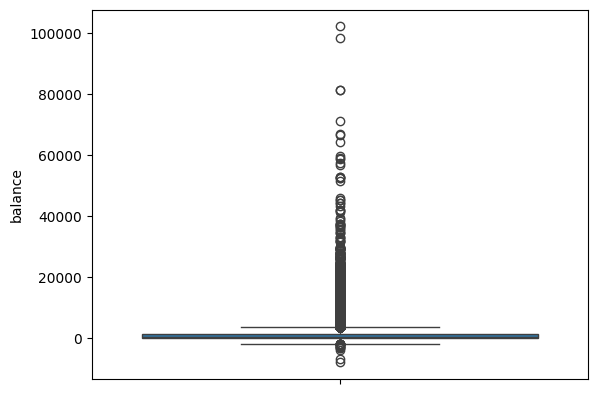

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=bank_data['balance'])
plt.show()

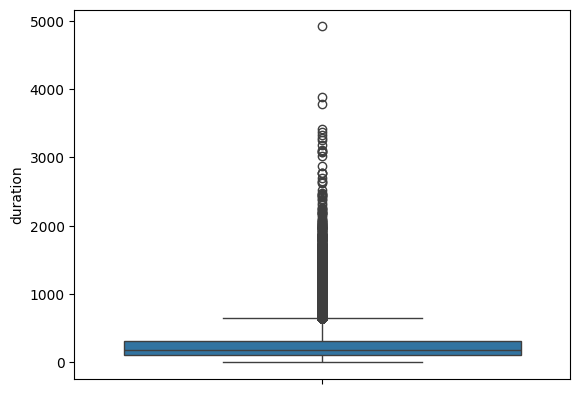

In [30]:
sns.boxplot(data=bank_data['duration'])
plt.show()

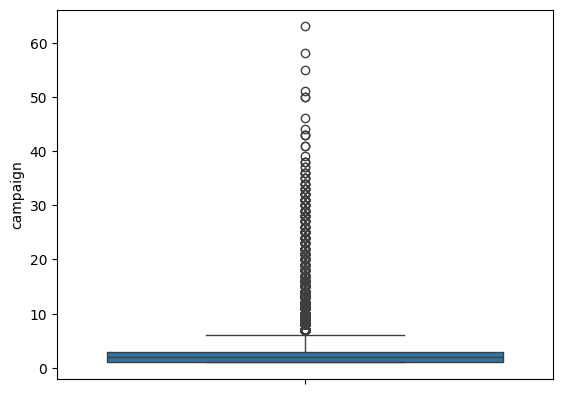

In [31]:
sns.boxplot(data=bank_data['campaign'])
plt.show()

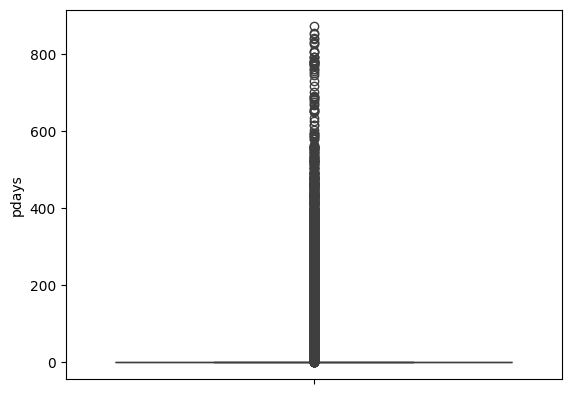

In [32]:
sns.boxplot(data=bank_data['pdays'])
plt.show()

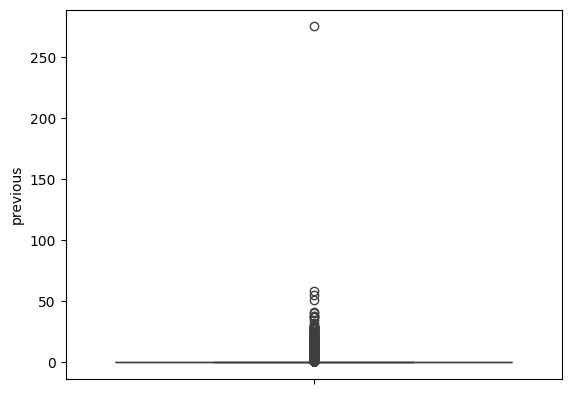

In [33]:
sns.boxplot(data=bank_data['previous'])
plt.show()

In [34]:
bank_data.corr()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y
age,1.000000,-0.017879,0.097783,-0.185513,-0.015655,-0.004648,0.004760,-0.023758,0.001288,0.025155
default,-0.017879,1.000000,-0.066745,-0.006025,0.077234,-0.010021,0.016822,-0.029979,-0.018329,-0.022419
balance,0.097783,-0.066745,1.000000,-0.068768,-0.084350,0.021560,-0.014578,0.003435,0.016674,0.052838
housing,-0.185513,-0.006025,-0.068768,1.000000,0.041323,0.005075,-0.023599,0.124178,0.037076,-0.139173
loan,-0.015655,0.077234,-0.084350,0.041323,1.000000,-0.012412,0.009980,-0.022754,-0.011043,-0.068185
duration,-0.004648,-0.010021,0.021560,0.005075,-0.012412,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,0.016822,-0.014578,-0.023599,0.009980,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,-0.029979,0.003435,0.124178,-0.022754,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,-0.018329,0.016674,0.037076,-0.011043,0.001203,-0.032855,0.454820,1.000000,0.093236
y,0.025155,-0.022419,0.052838,-0.139173,-0.068185,0.394521,-0.073172,0.103621,0.093236,1.000000


<ipython-input-35-bf0daa16cceb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x="y",data=bank_data,palette="hls")


<Axes: xlabel='y', ylabel='count'>

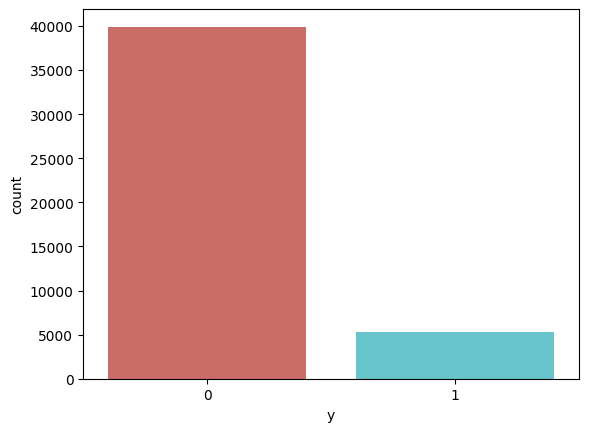

In [35]:
sb.countplot(x="y",data=bank_data,palette="hls")

In [36]:
# Model building
from sklearn.linear_model import LogisticRegression
bank_data.shape

(45211, 10)

In [37]:
X = bank_data.iloc[:,[0,1,2,3,4,5,6,7,8]]
Y = bank_data.iloc[:,9]
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X,Y)

LogisticRegression(max_iter=1000)

In [38]:
classifier.coef_  # coefficients of features

array([[-3.24975720e-02, -4.94773581e-02,  2.09698179e-05,
        -1.69001249e+00, -4.78669521e-01,  3.68343958e-03,
        -2.03072865e-01,  2.80516329e-03,  8.32130929e-02]])

In [39]:
classifier.predict_proba (X) # Probability values

array([[0.97333224, 0.02666776],
       [0.97319021, 0.02680979],
       [0.98183333, 0.01816667],
       ...,
       [0.29758127, 0.70241873],
       [0.8327299 , 0.1672701 ],
       [0.40050882, 0.59949118]])

In [40]:
y_pred = classifier.predict(X)
bank_data["y_pred"] = y_pred
bank_data

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,y_pred
0,58,0,2143,1,0,261,1,-1,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,0
2,33,0,2,1,1,76,1,-1,0,0,0
3,47,0,1506,1,0,92,1,-1,0,0,0
4,33,0,1,0,0,198,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,1,1
45207,71,0,1729,0,0,456,2,-1,0,1,0
45208,72,0,5715,0,0,1127,5,184,3,1,1
45209,57,0,668,0,0,508,4,-1,0,0,0


In [41]:
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
new_df = pd.concat([bank_data,y_prob],axis=1)
new_df

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,y_pred,0,1
0,58,0,2143,1,0,261,1,-1,0,0,0,0.973332,0.026668
1,44,0,29,1,0,151,1,-1,0,0,0,0.973190,0.026810
2,33,0,2,1,1,76,1,-1,0,0,0,0.981833,0.018167
3,47,0,1506,1,0,92,1,-1,0,0,0,0.979681,0.020319
4,33,0,1,0,0,198,1,-1,0,0,0,0.797670,0.202330
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,1,1,0.371968,0.628032
45207,71,0,1729,0,0,456,2,-1,0,1,0,0.860951,0.139049
45208,72,0,5715,0,0,1127,5,184,3,1,1,0.297581,0.702419
45209,57,0,668,0,0,508,4,-1,0,0,0,0.832730,0.167270


In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39088   834]
 [ 4190  1099]]


In [43]:
pd.crosstab(y_pred,Y)

y,0,1
row_0,,
0,39088,4190
1,834,1099


In [44]:
#type(y_pred)
accuracy = sum(Y==y_pred)/bank_data.shape[0]
accuracy

0.8888766008272323

In [45]:
from sklearn.metrics import classification_report
print (classification_report (Y, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.21      0.30      5289

    accuracy                           0.89     45211
   macro avg       0.74      0.59      0.62     45211
weighted avg       0.86      0.89      0.87     45211



In [46]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(Y,classifier.predict(X))
Logit_roc_score

0.5934495076895503

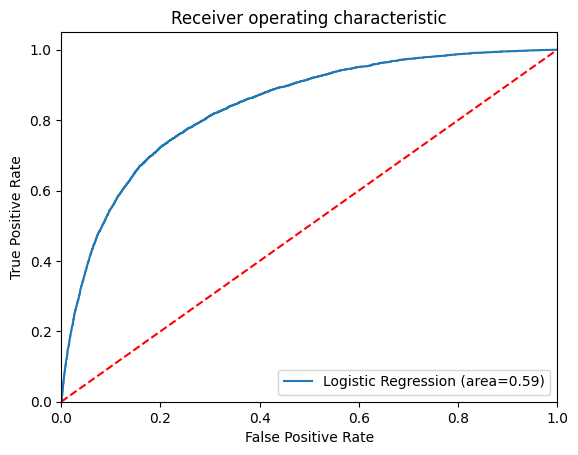

In [47]:
fpr, tpr, thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1])
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [48]:
y_prob1 = pd.DataFrame(classifier.predict_proba(X)[:,1])

In [49]:
y_prob1

,0
0,0.026668
1,0.026810
2,0.018167
3,0.020319
4,0.202330
...,...
45206,0.628032
45207,0.139049
45208,0.702419
45209,0.167270


In [50]:
import statsmodels.api as sm

In [51]:
logit = sm.Logit(Y, X)

In [52]:
logit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.290165
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45202
Method:                           MLE   Df Model:                            8
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:                  0.1959
Time:                        11:17:38   Log-Likelihood:                -13119.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0478      0.001    -57.942      0.000      -0.049      -0.046
default       -0.5639      0.156     -3.613      0.000      -0.870      -0.258
balance     1.777e-05   4.57e-06      3.886      0.000    8.81e-06    2.67e-05
housing       -1.5733      0.034    -46.251      0.000      -1.640      -1.507
loan          -0.8704      0.055    -15.684      0.000      -0.979      -0.762
duration       0.0035   5.76e-05     61.129      0.000       0.003       0.004
campaign      -0.2432      0.011    -22.723      0.000      -0.264      -0.222
pdays          0.0024      0.000     14.747      0.000       0.002       0.003
previous       0.0819      0.008     10.254      0.000       0.066       0.098
==============================================================================
"""

In [53]:
fpr

array([0.00000000e+00, 2.50488452e-05, 7.51465357e-05, ...,
       9.96668504e-01, 9.96668504e-01, 1.00000000e+00])

In [54]:
tpr

array([0.        , 0.        , 0.        , ..., 0.99981093, 1.        ,
       1.        ])

In [55]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(classifier.predict_proba(X)[:,1]>thres,1,0)
    accuracy_ls.append(accuracy_score(Y, y_pred, normalize=True))

accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls

,thresholds,accuracy
887,5.173628e-01,0.888987
884,5.184540e-01,0.888987
888,5.172403e-01,0.888965
885,5.183843e-01,0.888965
883,5.185985e-01,0.888965
...,...,...
7410,1.432781e-03,0.125102
7411,1.421210e-03,0.125080
7412,2.661342e-04,0.119927
7413,2.661251e-04,0.119904


In [56]:
from numpy import argmax
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.135000


In [57]:
threshold = 0.525080
preds = np.where(classifier.predict_proba(X)[:,1] > threshold, 1, 0)
print(classification_report(Y,preds))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.19      0.29      5289

    accuracy                           0.89     45211
   macro avg       0.74      0.59      0.61     45211
weighted avg       0.86      0.89      0.86     45211

